In [3]:
# This notebook is for gradient distribution and voxel-wise correlation of functional and structural gradients parcellation used are HCPMMP.

# Includes:
#     laoding gradient data
#     BF color coding by coordinate system
#     checking and saving resampled (to 1.6mm matching func) diffusion gradients
#     gradient distribution histogram
#     gradient correlations (func x func, struct x struct, func x struct)
#     joint fig of gradient correlation and distribution histogram

In [1]:
import os
from numpy import load
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm
import pandas as pd
import nibabel as nib
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn import preprocessing
from scipy.stats import linregress
from copy import copy

### Setting the path

In [2]:
# get the current notebook path
note_path = "/home/ROBARTS/schakraborty/graham/sudesnacPJ/21_Codes/HumanBF-Parcellation/notebook/"
data_path = "/home/ROBARTS/schakraborty/graham/sudesnacPJ/21_Codes/HumanBF-Parcellation/data/"
results_path = "/home/ROBARTS/schakraborty/graham/sudesnacPJ/21_Codes/HumanBF-Parcellation/results/Grad_corr/"
fig_path = "/home/ROBARTS/schakraborty/graham/sudesnacPJ/21_Codes/HumanBF-Parcellation/results/figures/Grad_corr/"

In [3]:
Func_results_path = "/home/ROBARTS/schakraborty/graham/sudesnacPJ/21_Codes/HumanBF-Parcellation/results/Func_HCPMMP/"
Diff_results_path = "/home/ROBARTS/schakraborty/graham/sudesnacPJ/21_Codes/HumanBF-Parcellation/results/Diff_7Tsubj7TDWI/"

In [7]:
Sch_Func_results_path = "/home/ROBARTS/schakraborty/graham/sudesnacPJ/21_Codes/HumanBF-Parcellation/results/Func_Schaefer/"
UR100_Diff_results_path = "/home/ROBARTS/schakraborty/graham/sudesnacPJ/21_Codes/HumanBF-Parcellation/results/Diff_UR100/"

### Loading gradient data

In [5]:
func_gm = pd.read_csv(Func_results_path + 'Func_HCPMMP_gradients_seed-BASF_1p6mm.csv')
diff_gm = pd.read_csv(Diff_results_path + 'Diff_7Tsubj7TDWI_gradients_seed-BASF_0p7mm.csv')

In [9]:
Sch_func_gm = pd.read_csv(Sch_Func_results_path + 'Func_Schaefer_gradients_seed-BASF_1p6mm.csv')
UR100_diff_gm = pd.read_csv(UR100_Diff_results_path + 'Diff_UR100_gradients_seed-BASF_0p7mm.csv')

In [10]:
func_gm

0         1         2         3         4         5         6  \
0    0.151822 -0.047482 -0.013830  0.049574  0.014777  0.001523 -0.011459   
1   -0.172966  0.054630 -0.005035  0.001567  0.008826  0.007191  0.003783   
2   -0.129850  0.004093  0.033544 -0.003277  0.011646  0.007041 -0.006514   
3   -0.055277 -0.058552  0.059570 -0.004472 -0.009255 -0.003987 -0.004555   
4    0.049931 -0.116084  0.039588  0.028193 -0.025803 -0.010164  0.002144   
..        ...       ...       ...       ...       ...       ...       ...   
594 -0.176536  0.078773 -0.020059  0.002060 -0.001262  0.003503  0.009146   
595 -0.174797  0.077244 -0.020867  0.001693 -0.001434  0.003406  0.009339   
596 -0.190892  0.083946 -0.012693  0.005197  0.003485  0.002261  0.004763   
597 -0.177774  0.064819  0.015225  0.003618  0.008694 -0.003207 -0.006572   
598 -0.173509  0.075512  0.018726  0.011351  0.003005 -0.011210 -0.010954   

            7         8         9  
0   -0.004889  0.004044 -0.000922  
1   -0.010360 -0.004866 -0.007757  
2   -0.007988 -0.010824  0.003299  
3   -0.003294  0.000969  0.008004  
4   -0.006117 -0.002433 -0.010214  
..        ...       ...       ...  
594  0.007067  0.011968 -0.002012  
595  0.007041  0.012063 -0.002024  
596  0.008864 -0.000261 -0.006562  
597  0.012575 -0.009891 -0.004569  
598  0.022234 -0.011045  0.000018  

[599 rows x 10 columns]

### Gradient distribution histogram

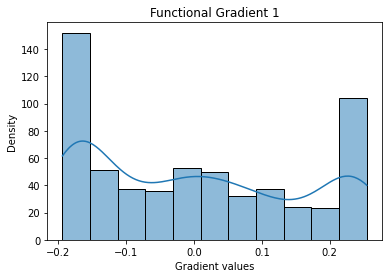

In [85]:
ax = sns.histplot(data=func_gm, x="0", kde=True)
ax.set(xlabel='Gradient values', ylabel='Density')
plt.title("Functional Gradient 1")
plt.show()

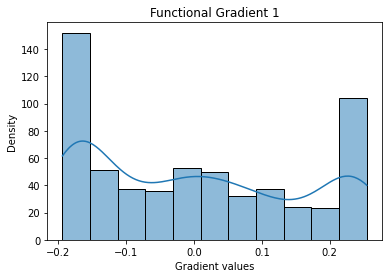

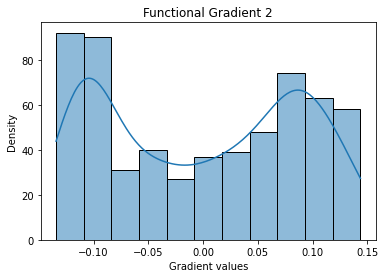

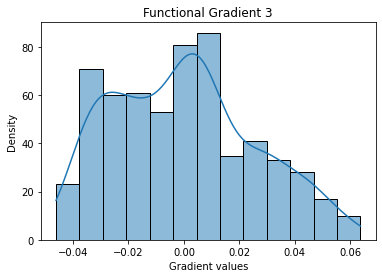

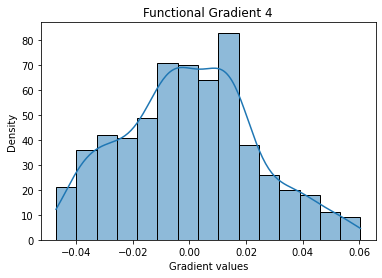

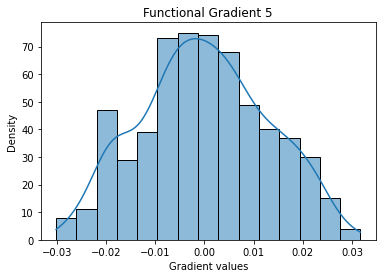

In [70]:
for gradi in range(5):
    ax = sns.histplot(data=func_gm, x=str(gradi), kde=True)
    ax.set(xlabel='Gradient values', ylabel='Density')
    plt.title("Functional Gradient " + str(gradi+1))
    plt.savefig(fig_path + f'Func_HCPMMP_BF_Gradient_histogram_'+ str(gradi+1)+'.png', dpi=300)
    plt.show()

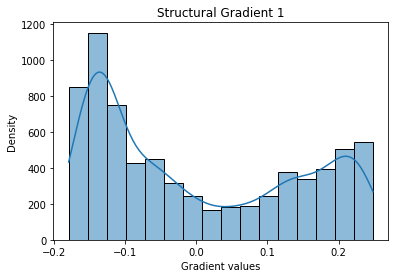

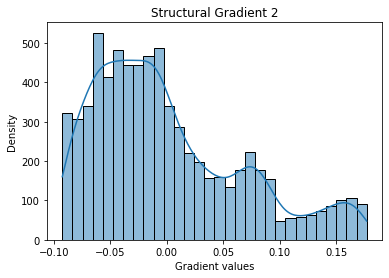

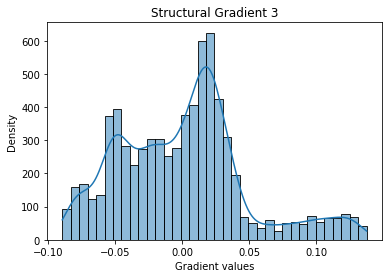

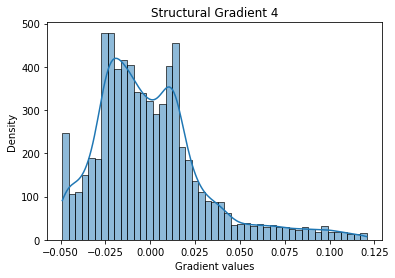

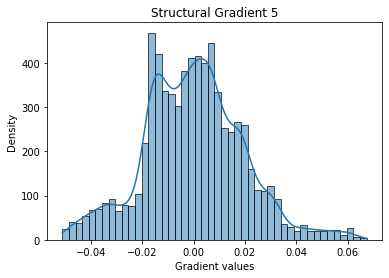

In [144]:
for gradi in range(5):
    ax = sns.histplot(data=diff_gm, x=str(gradi), kde=True)
    ax.set(xlabel='Gradient values', ylabel='Density')
    plt.title("Structural Gradient " + str(gradi+1))
    plt.savefig(fig_path + f'Diff_7Tsubj7TDWI_BF_Gradient_histogram_'+ str(gradi+1)+'.png', dpi=300)
    plt.show()

### Checking resampled dMRI to match rfMRI resolution

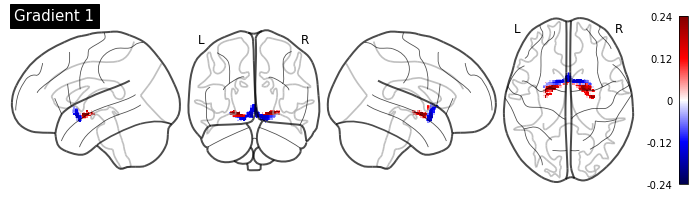

In [77]:
# Checking resampled diffusion gradients
from nilearn.plotting import view_img, plot_glass_brain, plot_anat, plot_roi
# display figures
gradi = 0
grad_nib = nib.load(results_path + f'Diff_resampled_gradient_{gradi}.nii.gz')
color = matplotlib.cm.get_cmap('seismic')
plot_glass_brain(grad_nib, colorbar=True, title=(f'Gradient '+ str(gradi+1)), display_mode='lyrz', plot_abs=False, cmap=color)

In [237]:
gradi = 0
grad_nib = nib.load(results_path + f'Diff_resampled_gradient_{gradi}.nii.gz').get_fdata()
DiffR_G1_idx = np.argwhere(grad_nib)
DiffR_G1_values = grad_nib[DiffR_G1_idx[:,0], DiffR_G1_idx[:,1], DiffR_G1_idx[:,2]]
DiffRIdx_df = pd.DataFrame(DiffR_G1_values)

In [294]:
# saving resampled diff gradients to data frame
DiffRIdx_df = pd.DataFrame()
for gradi in range(5):
    grad_nib = nib.load(results_path + f'Diff_resampled_gradient_{gradi}.nii.gz').get_fdata()
    DiffR_idx = np.argwhere(grad_nib)
    DiffR_values = grad_nib[DiffR_idx[:,0], DiffR_idx[:,1], DiffR_idx[:,2]]
    DiffRIdx_df[str(gradi)] = pd.DataFrame(DiffR_values)

In [295]:
# saving the data frame to csv file
pd.DataFrame(DiffRIdx_df).to_csv(results_path + 'Diff_resampled_gradients_seed-BASF_1p6mm.csv', index=False)

### BF color-code

In [6]:
rfmri_fname = (Func_results_path + 'Func_HCPMMP_gradient_{0}.nii.gz')
dmri_fname = (results_path + 'Diff_resampled_gradient_{0}.nii.gz')

In [8]:
hrdmri_fname = (Diff_results_path + 'Diff_7Tsubj7TDWI_gradient_{0}.nii.gz')

In [9]:
dmri_g1_nii = nib.load(dmri_fname.format(0))
rfmri_g1_nii  = nib.load(rfmri_fname.format(0))
hrdmri_g1_nii = nib.load(hrdmri_fname.format(0))

In [10]:
dmri_g1  = dmri_g1_nii.get_fdata()
dmri_mask = np.where(dmri_g1, 1, 0)

rfmri_g1 = rfmri_g1_nii.get_fdata()
rfmri_mask = np.where(rfmri_g1, 1, 0)

hrdmri_g1  = hrdmri_g1_nii.get_fdata()
hrdmri_mask = np.where(hrdmri_g1, 1, 0)

#### Functional mask color

In [104]:
# Functional mask color
# Get X, Y, Z coordinates
ijk_indices = np.argwhere(rfmri_mask)
ijk_indices = np.hstack((ijk_indices,np.ones((len(ijk_indices),1))))

affine = rfmri_g1_nii.affine

xyz_coords = np.dot(ijk_indices, affine)

In [105]:
# Here we flip along the X axis to give left and right same color codes
new_ijk_indices = ijk_indices.copy()
new_ijk_indices[:,0] = np.abs((rfmri_mask.shape[0]/2)-ijk_indices[:,0])

In [106]:
# Create RGB array
min_max_scaler = preprocessing.MinMaxScaler()

c_rfmri = np.zeros((len(new_ijk_indices),3))
c_rfmri[:,0] = min_max_scaler.fit_transform(new_ijk_indices[:,0][:,np.newaxis])[:,0]
c_rfmri[:,1] = min_max_scaler.fit_transform(new_ijk_indices[:,1][:,np.newaxis])[:,0]
c_rfmri[:,2] = min_max_scaler.fit_transform(new_ijk_indices[:,2][:,np.newaxis])[:,0]

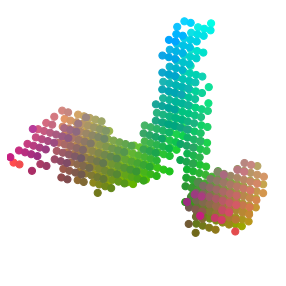

In [107]:
fig = plt.figure(figsize=(10,5))
ax2 = fig.add_subplot(projection='3d')
ax2.dist=6
ax2.set_axis_off()

ax2.scatter(
    ijk_indices[:,0],
    ijk_indices[:,1],
    ijk_indices[:,2],
    s=50, alpha=1,
    c=c_rfmri
)

plt.show()

#### Structural (high-res diffusion) mask color

In [98]:
# Get X, Y, Z coordinates
ijk_indices = np.argwhere(hrdmri_mask)
ijk_indices = np.hstack((ijk_indices,np.ones((len(ijk_indices),1))))

affine = hrdmri_g1_nii.affine

xyz_coords = np.dot(ijk_indices, affine)

In [99]:
# Here we flip along the X axis to give left and right same color codes
new_ijk_indices = ijk_indices.copy()
new_ijk_indices[:,0] = np.abs((hrdmri_mask.shape[0]/2)-ijk_indices[:,0])

In [100]:
# Create RGB array
min_max_scaler = preprocessing.MinMaxScaler()

c_hrdmri = np.zeros((len(new_ijk_indices),3))
c_hrdmri[:,0] = min_max_scaler.fit_transform(new_ijk_indices[:,0][:,np.newaxis])[:,0]
c_hrdmri[:,1] = min_max_scaler.fit_transform(new_ijk_indices[:,1][:,np.newaxis])[:,0]
c_hrdmri[:,2] = min_max_scaler.fit_transform(new_ijk_indices[:,2][:,np.newaxis])[:,0]

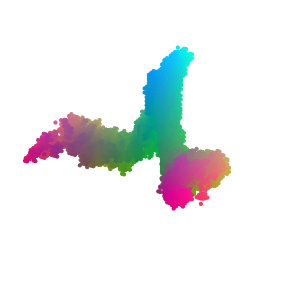

In [101]:
fig = plt.figure(figsize=(10,5))
ax2 = fig.add_subplot(projection='3d')
ax2.dist=8
ax2.set_axis_off()

ax2.scatter(
    ijk_indices[:,0],
    ijk_indices[:,1],
    ijk_indices[:,2],
    s=10, alpha=1,
    c=c_hrdmri
)

plt.show()

### BF Gradient correlations

#### Functional gradients

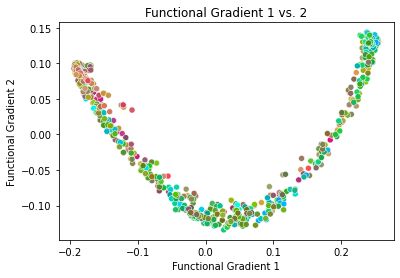

In [37]:
ax = sns.scatterplot(data=func_gm, x="0", y="1", c=c_rfmri)
ax.set(xlabel='Functional Gradient 1', ylabel='Functional Gradient 2')
plt.title("Functional Gradient 1 vs. 2")
plt.show()

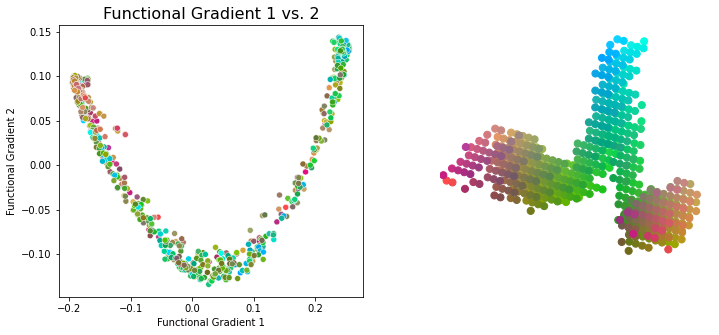

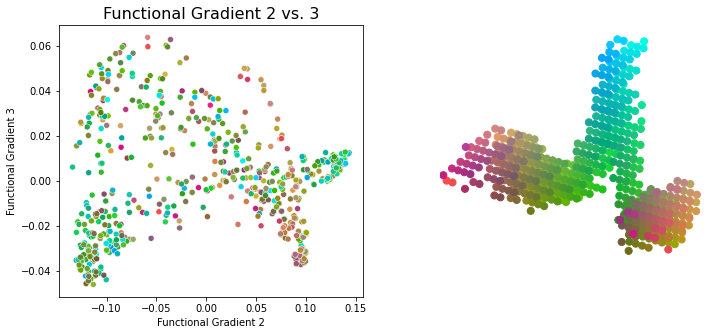

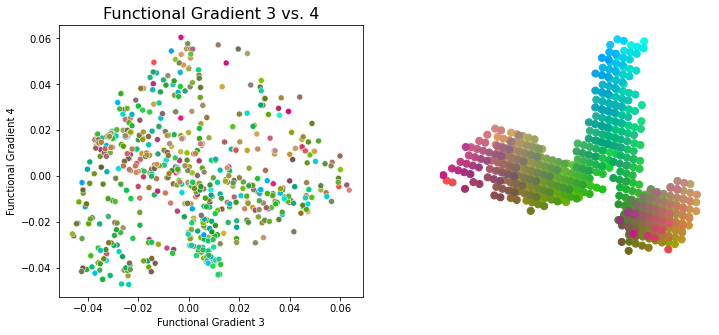

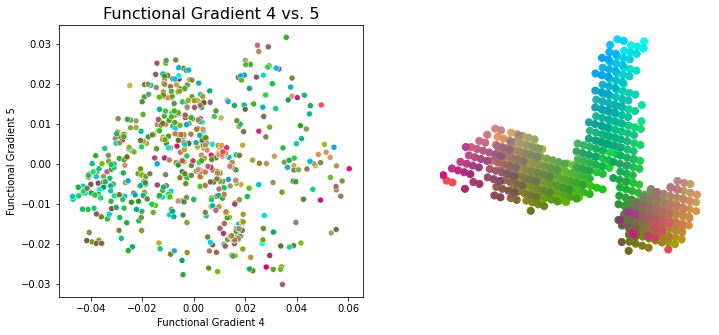

In [67]:
for gradi in range(4):
    fig = plt.figure(figsize=(12,5))
    ax1 = fig.add_subplot(1,2,1)
    ax1 = sns.scatterplot(data=func_gm, x=str(gradi), y=str(gradi+1), c=c_rfmri)
    ax1.set(xlabel='Functional Gradient '+ str(gradi+1), ylabel='Functional Gradient '+ str(gradi+2))
    plt.title("Functional Gradient " + str(gradi+1) + " vs. " + str(gradi+2), fontsize=16)
    ax2 = fig.add_subplot(1,2,2, projection='3d')
    ax2.dist=6
    ax2.set_axis_off()
    ax2.scatter(ijk_indices[:,0],ijk_indices[:,1],ijk_indices[:,2],s=50, alpha=1,c=c_rfmri)
    plt.savefig(fig_path + f'Func_HCPMMP_BF_Gradient_correlation_'+ str(gradi+1)+'_vs_'+ str(gradi+2)+'.png', dpi=300)
    plt.show()

#### Sructural gradients

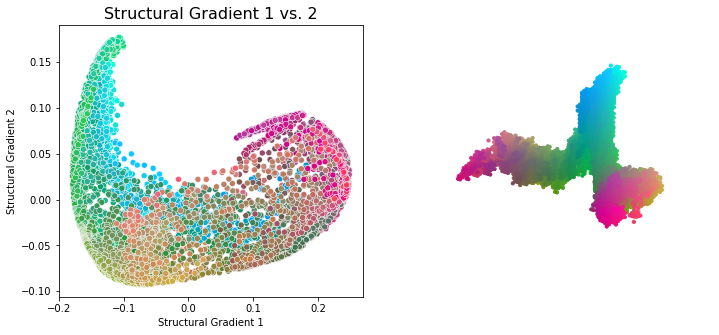

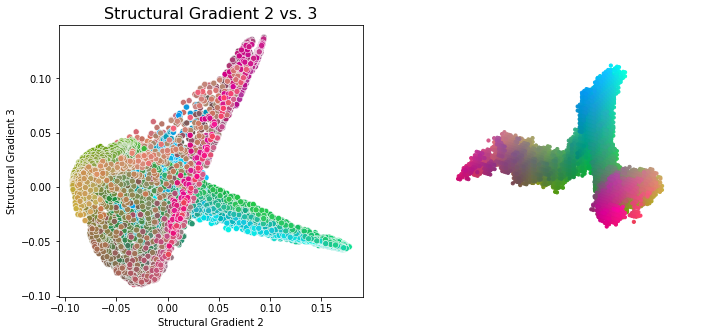

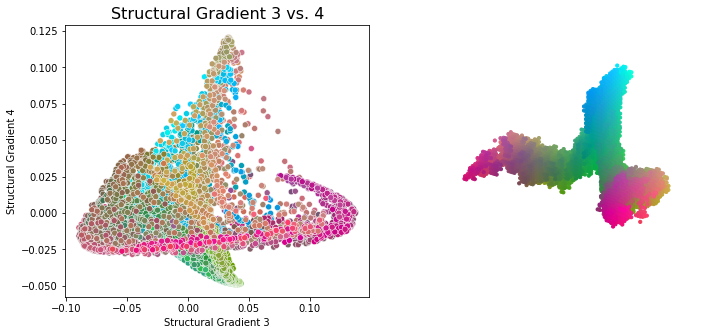

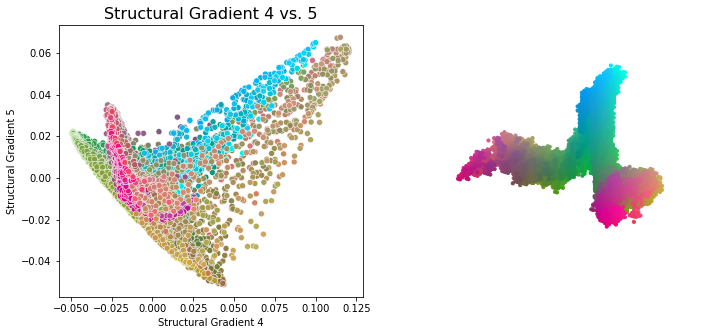

In [74]:
for gradi in range(4):
    fig = plt.figure(figsize=(12,5))
    ax1 = fig.add_subplot(1,2,1)
    ax1 = sns.scatterplot(data=diff_gm, x=str(gradi), y=str(gradi+1), c=c_hrdmri)
    ax1.set(xlabel='Structural Gradient '+ str(gradi+1), ylabel='Structural Gradient '+ str(gradi+2))
    plt.title("Structural Gradient " + str(gradi+1) + " vs. " + str(gradi+2), fontsize=16)
    ax2 = fig.add_subplot(1,2,2, projection='3d')
    ax2.dist=8
    ax2.set_axis_off()
    ax2.scatter(ijk_indices[:,0],ijk_indices[:,1],ijk_indices[:,2],s=10, alpha=1,c=c_hrdmri)
    plt.savefig(fig_path + f'Diff_7Tsubj7TDWI_BF_Gradient_correlation_'+ str(gradi+1)+'_vs_'+ str(gradi+2)+'.png', dpi=300)
    plt.show()

### Gradients correlation with gradient distribution

#### Functional gradients

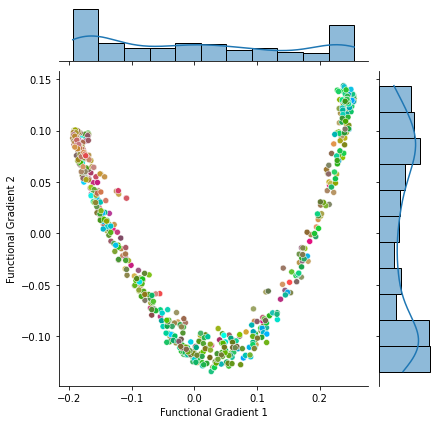

In [91]:
g = sns.JointGrid(data=func_gm, x="0", y="1")
g.plot_joint(sns.scatterplot, c=c_rfmri)
g.plot_marginals(sns.histplot, kde=True)
g.set_axis_labels(xlabel='Functional Gradient 1', ylabel='Functional Gradient 2')

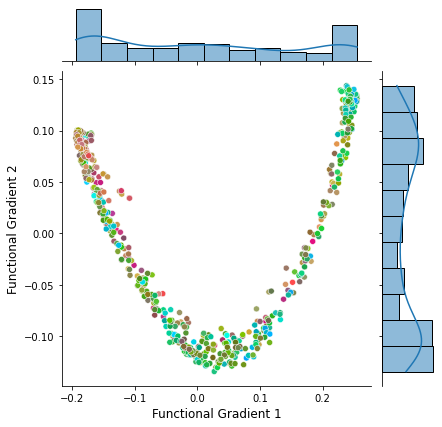

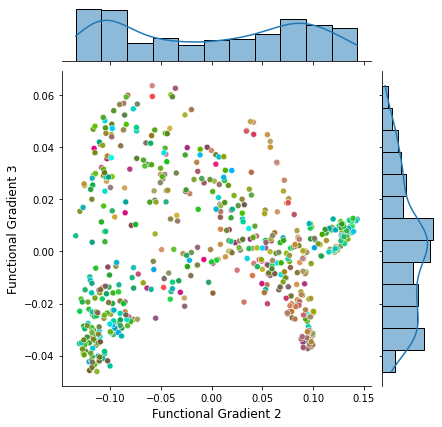

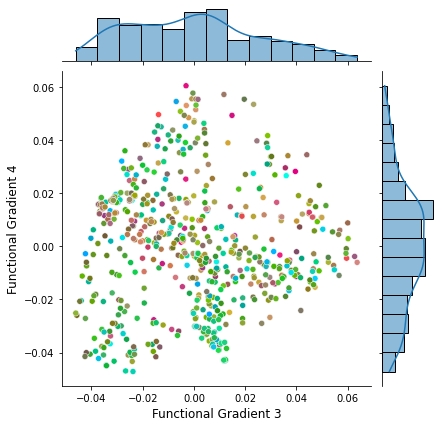

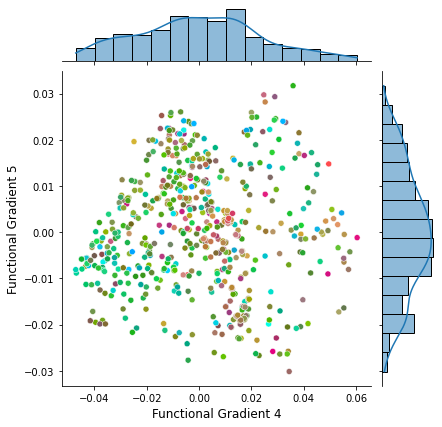

In [97]:
for gradi in range(4):
    g = sns.JointGrid(data=func_gm, x=str(gradi), y=str(gradi+1))
    g.plot_joint(sns.scatterplot, c=c_rfmri)
    g.plot_marginals(sns.histplot, kde=True)
    g.set_axis_labels(xlabel='Functional Gradient '+str(gradi+1), ylabel='Functional Gradient '+str(gradi+2), fontsize=12)
    g.savefig(fig_path + f'Func_HCPMMP_BF_Gradient_correlation_and_distribution_Gradient_'+ str(gradi+1)+'_vs_'+ str(gradi+2)+'.png', dpi=300)

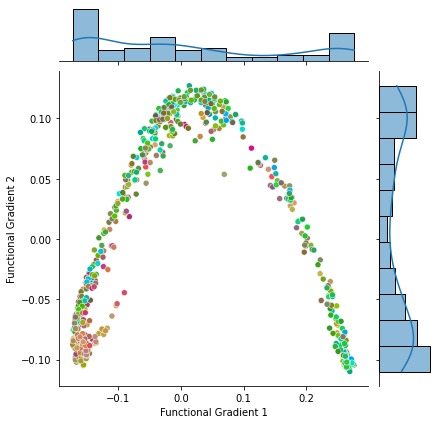

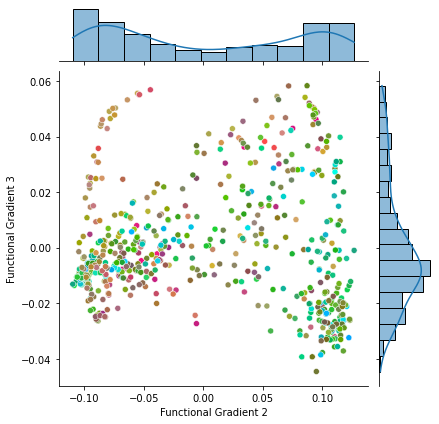

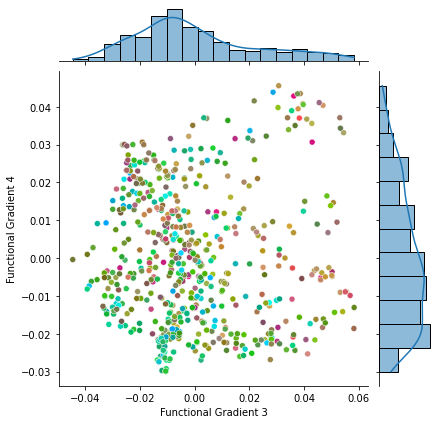

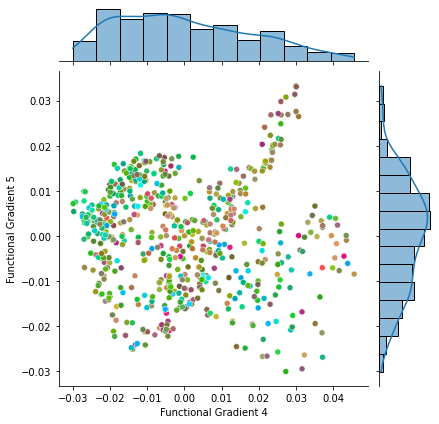

In [108]:
for gradi in range(4):
    g = sns.JointGrid(data=Sch_func_gm, x=str(gradi), y=str(gradi+1))
    g.plot_joint(sns.scatterplot, c=c_rfmri)
    g.plot_marginals(sns.histplot, kde=True)
    g.set_axis_labels(xlabel='Functional Gradient '+str(gradi+1), ylabel='Functional Gradient '+str(gradi+2))
    g.savefig(fig_path + f'Func_Schaefer_BF_Gradient_correlation_and_distribution_Gradient_'+ str(gradi+1)+'_vs_'+ str(gradi+2)+'.png', dpi=300)

#### Structural gradients

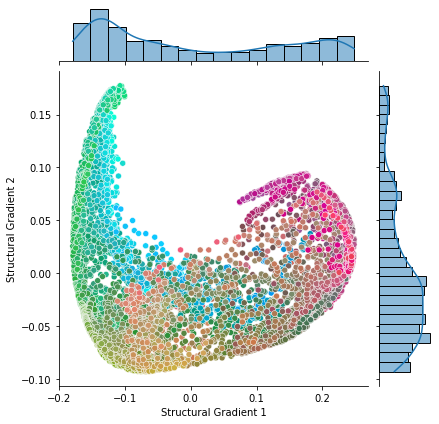

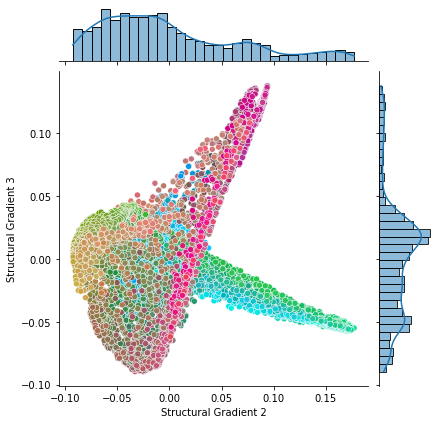

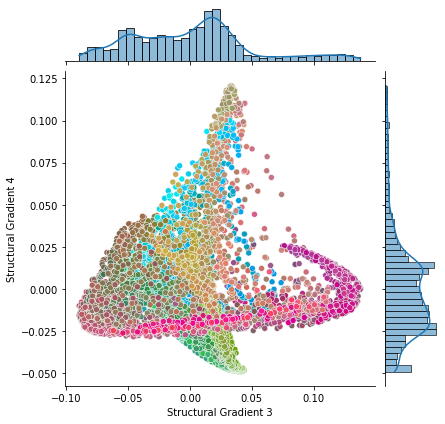

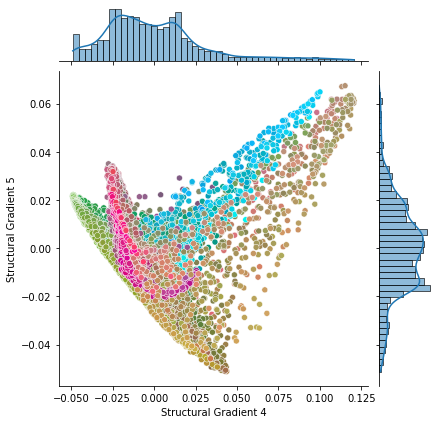

In [102]:
for gradi in range(4):
    g = sns.JointGrid(data=diff_gm, x=str(gradi), y=str(gradi+1))
    g.plot_joint(sns.scatterplot, c=c_hrdmri)
    g.plot_marginals(sns.histplot, kde=True)
    g.set_axis_labels(xlabel='Structural Gradient '+str(gradi+1), ylabel='Structural Gradient '+str(gradi+2))
    g.savefig(fig_path + f'Diff_7Tsubj7TDWI_BF_Gradient_correlation_and_distribution_Gradient_'+ str(gradi+1)+'_vs_'+ str(gradi+2)+'.png', dpi=300)

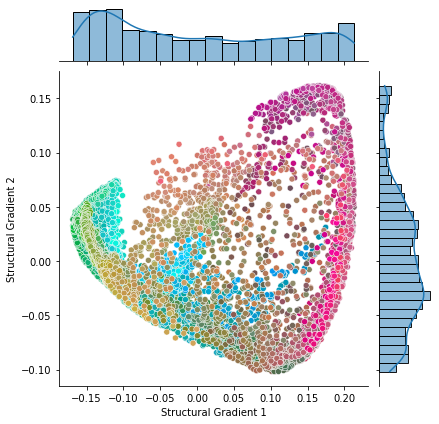

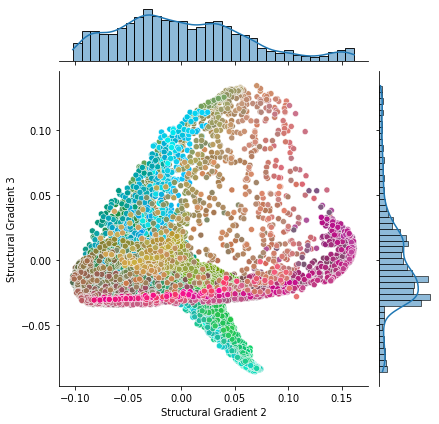

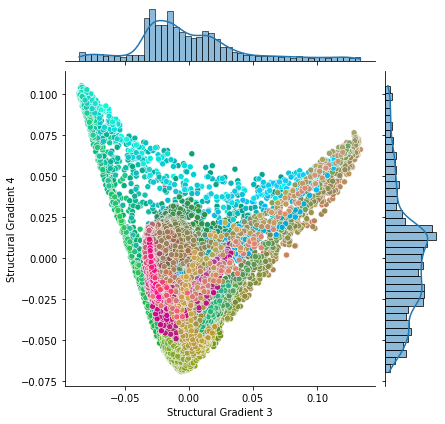

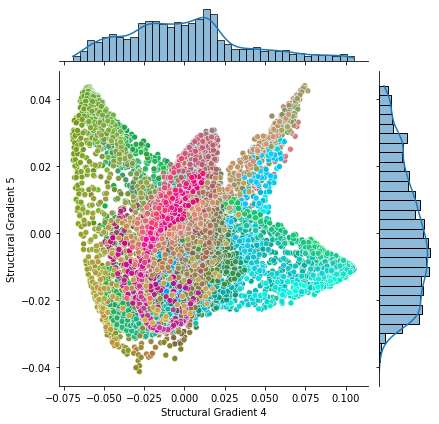

In [103]:
for gradi in range(4):
    g = sns.JointGrid(data=UR100_diff_gm, x=str(gradi), y=str(gradi+1))
    g.plot_joint(sns.scatterplot, c=c_hrdmri)
    g.plot_marginals(sns.histplot, kde=True)
    g.set_axis_labels(xlabel='Structural Gradient '+str(gradi+1), ylabel='Structural Gradient '+str(gradi+2))
    g.savefig(fig_path + f'Diff_UR100_BF_Gradient_correlation_and_distribution_Gradient_'+ str(gradi+1)+'_vs_'+ str(gradi+2)+'.png', dpi=300)

### Functional x Structural Correlation

#### Combined mask color for functional vs. structural

In [11]:
combined_mask = np.zeros_like(dmri_mask)
combined_mask[(dmri_mask==1) & (rfmri_mask==1)] = 1

In [12]:
# Get X, Y, Z coordinates
ijk_indices = np.argwhere(combined_mask)
ijk_indices = np.hstack((ijk_indices,np.ones((len(ijk_indices),1))))

affine = rfmri_g1_nii.affine

xyz_coords = np.dot(ijk_indices, affine)

In [13]:
# Here we flip along the X axis to give left and right same color codes
new_ijk_indices = ijk_indices.copy()
new_ijk_indices[:,0] = np.abs((combined_mask.shape[0]/2)-ijk_indices[:,0])

In [14]:
# Create RGB array
min_max_scaler = preprocessing.MinMaxScaler()

c_com = np.zeros((len(new_ijk_indices),3))
c_com[:,0] = min_max_scaler.fit_transform(new_ijk_indices[:,0][:,np.newaxis])[:,0]
c_com[:,1] = min_max_scaler.fit_transform(new_ijk_indices[:,1][:,np.newaxis])[:,0]
c_com[:,2] = min_max_scaler.fit_transform(new_ijk_indices[:,2][:,np.newaxis])[:,0]

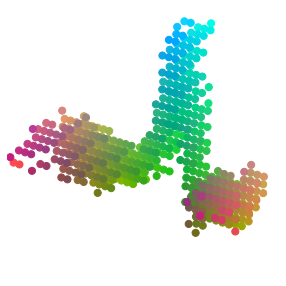

In [15]:
# combined functional x diffusion mask for func vs. diff
fig = plt.figure(figsize=(10,5))
ax2 = fig.add_subplot(projection='3d')
ax2.dist=6
ax2.set_axis_off()

ax2.scatter(
    ijk_indices[:,0],
    ijk_indices[:,1],
    ijk_indices[:,2],
    s=50, alpha=1,
    c=c_com
)

plt.show()

#### Correlation FG1 vs. SG1

In [16]:
# Rescale gradient values between 0 and 1
dmri_rescaled = min_max_scaler.fit_transform(dmri_g1[combined_mask==1][:,np.newaxis])
rfmri_rescaled = min_max_scaler.fit_transform(rfmri_g1[combined_mask==1][:,np.newaxis])

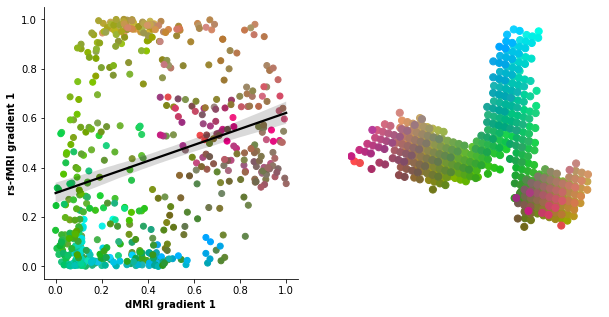

In [17]:
# Plot scatterplot colorcoded for XYZ coordinates
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)

ax1.scatter(dmri_rescaled, rfmri_rescaled, c=c_com)
# ax1.axhline(y=0, color='black', linestyle='--')
# ax1.axvline(x=0, color='black', linestyle='--')

ax1.set_xlabel('dMRI gradient 1', weight='bold')
ax1.set_ylabel('rs-fMRI gradient 1', weight='bold')

# Add fit line
sns.regplot(
    x=dmri_rescaled,
    y=rfmri_rescaled,
    scatter=False, line_kws={'color': 'black'},
    ax=ax1)

sns.despine()

# Add 3D scatterplot for visualizing RGB values
ax2 = fig.add_subplot(1,2,2, projection='3d')
ax2.dist=6
ax2.set_axis_off()

ax2.scatter(
    ijk_indices[:,0],
    ijk_indices[:,1],
    ijk_indices[:,2],
    s=50, alpha=1,
    c=c_com
)

plt.show()

#### All gradients R and R-squared 

In [18]:
r2_matrix = np.zeros((5,5))
r_matrix = np.zeros((5, 5))
p_matrix = np.zeros((5, 5))
reg_results = pd.DataFrame()


for g in range(0,5):
    dmri_g = nib.load(dmri_fname.format(g)).get_fdata()
    dmri_g_rescaled = min_max_scaler.fit_transform(dmri_g[combined_mask==1][:,np.newaxis])

    for gg in range(0,5):
        rfmri_g = nib.load(rfmri_fname.format(gg)).get_fdata()
        rfmri_g_rescaled = min_max_scaler.fit_transform(rfmri_g[combined_mask==1][:,np.newaxis])
        
        res = linregress(dmri_g[combined_mask==1].flatten(), rfmri_g[combined_mask==1].flatten())
        reg_results[g,gg] = pd.DataFrame(res)
        r2_matrix[g,gg] = res.rvalue**2
        r_matrix[g,gg] = res.rvalue
        p_matrix[g,gg] = res.pvalue
        
index = pd.Index(['slope', 'intercept', 'rvalue', 'pvalue', 'stderr'])
reg_results = reg_results.set_index(index)       

In [19]:
pd.DataFrame(reg_results).to_csv(results_path + 'Func_vs_Struct_linear_least-squares_regression_results.csv')

In [20]:
# Define the gradient labels so it starts from 1 instead of 0
x_axis_labels = [1,2,3,4,5] # labels for x-axis
y_axis_labels = [1,2,3,4,5] # labels for y-axis

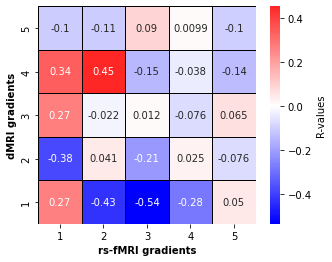

In [21]:
fig, ax = plt.subplots(1,1, figsize=(5,4))
sns.heatmap(r_matrix, cmap='bwr', center=0, linewidth=1, linecolor='black', square=True,
           cbar_kws={'label':'R-values'}, annot = True, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
ax.invert_yaxis()
ax.set_ylabel('dMRI gradients', weight='bold')
ax.set_xlabel('rs-fMRI gradients', weight='bold')
plt.savefig(fig_path + f'BF_Gradient_Func_vs_Struct_linear_least-squares_regression_R-values.png', dpi=300)
plt.show()

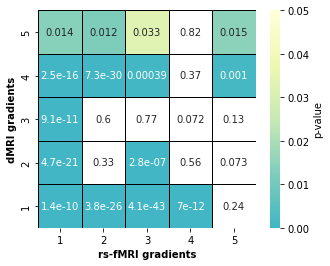

In [22]:
from copy import copy
#conditions for filtering p<=0.05
val_max = 0.05

fig, ax = plt.subplots(1,1, figsize=(5,4))

#define the colormap with clipping values
my_cmap = copy(plt.cm.YlGnBu_r)
my_cmap.set_over("white")
my_cmap.set_under("white")

sns.heatmap(p_matrix, vmax=val_max, cmap=my_cmap, center=0, linewidth=1, linecolor='black', square=True,
           cbar_kws={'label':'p-value'}, annot = True, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
ax.invert_yaxis()
ax.set_ylabel('dMRI gradients', weight='bold')
ax.set_xlabel('rs-fMRI gradients', weight='bold')
plt.savefig(fig_path + f'BF_Gradient_Func_vs_Struct_linear_least-squares_regression_p-values.png', dpi=300)
plt.show()

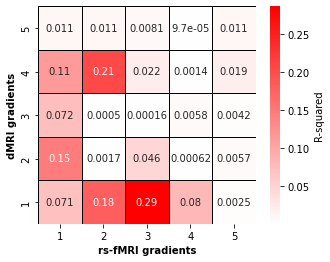

In [23]:
fig, ax = plt.subplots(1,1, figsize=(5,4))
sns.heatmap(r2_matrix, cmap='bwr', center=0, linewidth=1, linecolor='black', square=True,
           cbar_kws={'label':'R-squared'}, annot = True, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
ax.invert_yaxis()
ax.set_ylabel('dMRI gradients', weight='bold')
ax.set_xlabel('rs-fMRI gradients', weight='bold')
plt.savefig(fig_path + f'BF_Gradient_Func_vs_Struct_linear_least-squares_regression_R-squared.png', dpi=300)
plt.show()

In [25]:
rfmri_g_rescaled.shape

(563, 1)

In [ ]:
# Plot scatterplot colorcoded for XYZ coordinates
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)

ax1.scatter(dmri_rescaled, rfmri_rescaled, c=c)
# ax1.axhline(y=0, color='black', linestyle='--')
# ax1.axvline(x=0, color='black', linestyle='--')

ax1.set_xlabel('dMRI gradient 0', weight='bold')
ax1.set_ylabel('rs-fMRI gradient 0', weight='bold')

# Add fit line
sns.regplot(
    x=dmri_rescaled,
    y=rfmri_rescaled,
    scatter=False, line_kws={'color': 'black'},
    ax=ax1)

sns.despine()

# Add 3D scatterplot for visualizing RGB values
ax2 = fig.add_subplot(1,2,2, projection='3d')
ax2.dist=6
ax2.set_axis_off()

ax2.scatter(
    ijk_indices[:,0],
    ijk_indices[:,1],
    ijk_indices[:,2],
    s=50, alpha=1,
    c=c
)

plt.show()

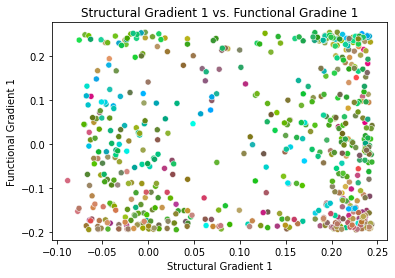

In [90]:
ax = sns.scatterplot(x=diff_gm["0"], y=func_gm["0"], c=c_rfmri)
ax.set(xlabel='Structural Gradient 1', ylabel='Functional Gradient 1')
plt.title("Structural Gradient 1 vs. Functional Gradine 1")
plt.show()

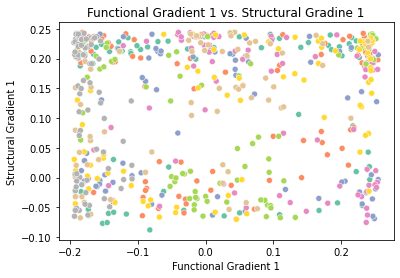

In [211]:
ax = sns.scatterplot(x=func_gm["0"], y=diff_gm["0"], c=FuncIdx_df.index, cmap='Set2')
ax.set(xlabel='Functional Gradient 1', ylabel='Structural Gradient 1')
plt.title("Functional Gradient 1 vs. Structural Gradine 1")
plt.show()

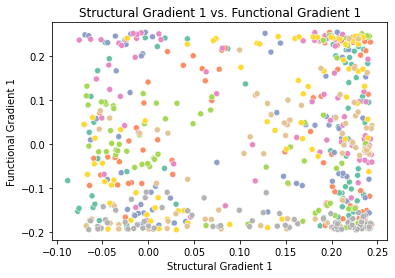

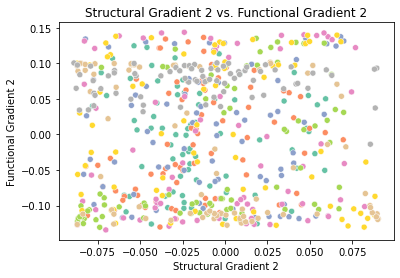

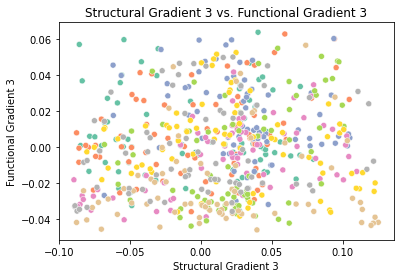

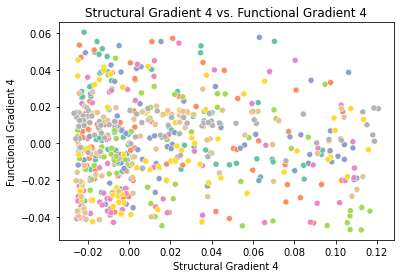

In [212]:
for gradi in range(4):
    ax = sns.scatterplot(x=diff_gm[str(gradi)], y=func_gm[str(gradi)], c=FuncIdx_df.index, cmap='Set2')
    ax.set(xlabel='Structural Gradient '+ str(gradi+1), ylabel='Functional Gradient '+ str(gradi+1))
    plt.title("Structural Gradient " + str(gradi+1) + " vs. Functional Gradient " + str(gradi+1))
    plt.savefig(fig_path + f'BF_Gradient_correlation_Structural_vs_Functional_Gradient_'+ str(gradi+1)+'.png', dpi=300)
    plt.show()

#### Correlation and distribution

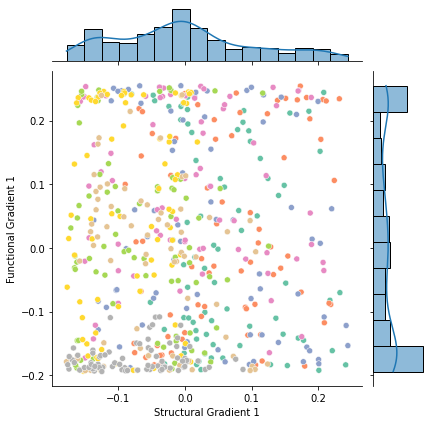

In [296]:
gradi = 0
g = sns.JointGrid(x=DiffRIdx_df[str(gradi)], y=func_gm[str(gradi)])
g.plot_joint(sns.scatterplot, c=FuncIdx_df.index, cmap='Set2')
g.plot_marginals(sns.histplot, kde=True)
g.set_axis_labels(xlabel='Structural Gradient '+str(gradi+1), ylabel='Functional Gradient '+str(gradi+1))

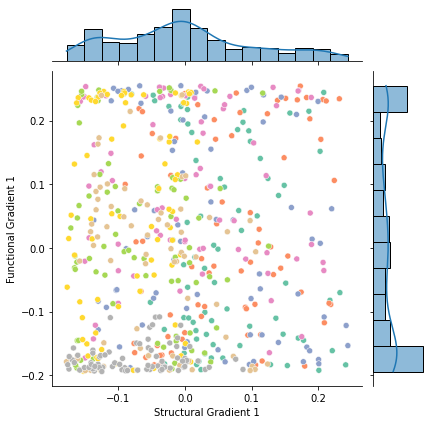

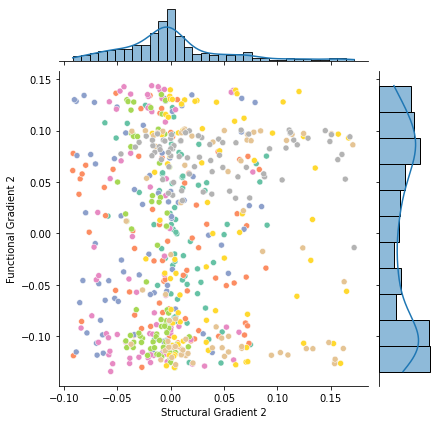

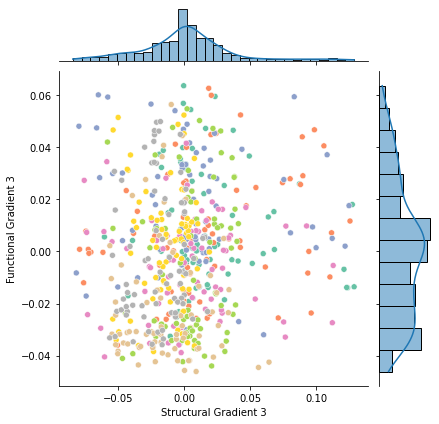

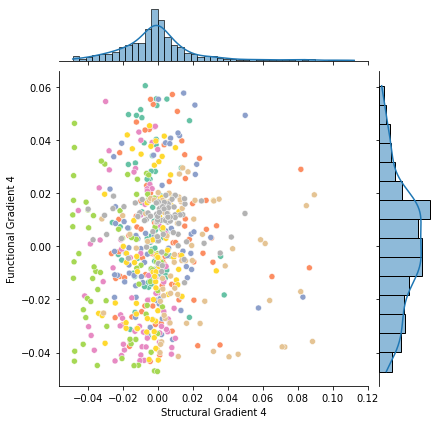

In [297]:
for gradi in range(4):
    g = sns.JointGrid(x=DiffRIdx_df[str(gradi)], y=func_gm[str(gradi)])
    g.plot_joint(sns.scatterplot, c=FuncIdx_df.index, cmap='Set2')
    g.plot_marginals(sns.histplot, kde=True)
    g.set_axis_labels(xlabel='Structural Gradient '+str(gradi+1), ylabel='Functional Gradient '+str(gradi+1))
    g.savefig(fig_path + f'BF_Gradient_correlation_and_distribution_HCPMMP_Resampled1p6mm_Structural_vs_Functional_Gradient_'+ str(gradi+1)+'.png', dpi=300)